In [117]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from tqdm import tqdm
import pickle

from swimAD2 import swimAD2 as ad2       
import time
import dwfconstants as dwfc

ad2.disconnect()            
zoroku = ad2.connect(0)

In [101]:
# Function defining block

def find_times(Ch2,ch2):
# Test by first bringing backwards. 
# If fails, test forwards. 
    backward,forward = [],[]
    for i in range(1,100):
        score = abs((Ch2[i:]-ch2[:-i])/(Ch2[i:]+ch2[:-i]))
        backward.append(np.mean(score))

        score = abs((Ch2[:-i]-ch2[i:])/(Ch2[:-i]+ch2[i:]))
        forward.append(np.mean(score))

    score_back = np.min(backward)
    score_forw = np.min(forward)

    if score_back > score_forw:
        i = np.argmin(forward)
        direction = "f"
    else: 
        i = np.argmin(backward) 
        direction = "b"
    return i, direction

def sync_series(t0,ch1,Ch2,ch2,ch3):
    i,direction = find_times(Ch2,ch2)
    if direction=="b":
        return t0[:-i],ch1[:-i],ch2[:-i],ch3[i:]
    else: 
        return t0[i:],ch1[i:],ch2[i:],ch3[:-i]
    
def sampling(time):
    # Priority on oscilloscope detection rata
    size = 8192
    rate = size/time
    return rate

5


1it [00:20, 20.25s/it]

9.9987537


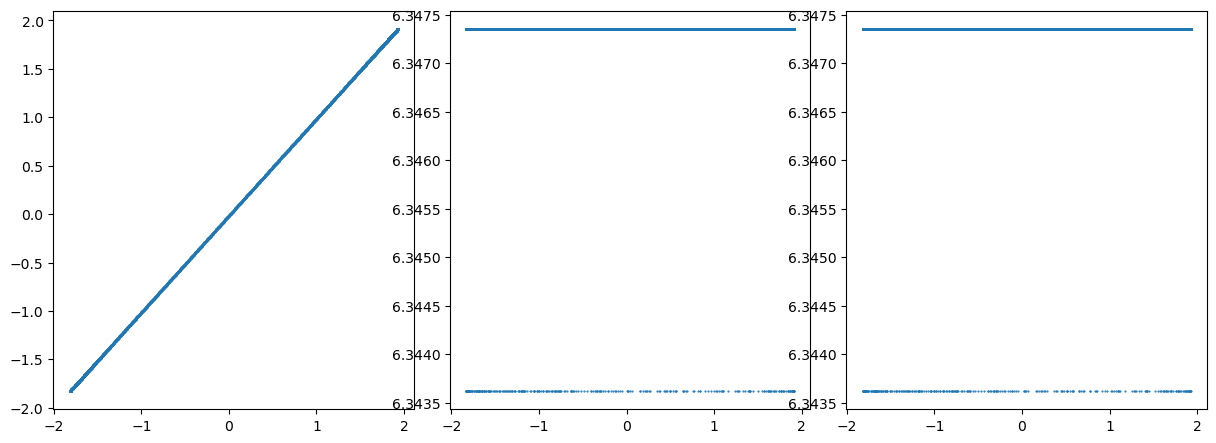

In [116]:
def create_row(nrow,grid):
    XY = plt.subplot(grid[nrow,1])
    YZ = plt.subplot(grid[nrow,2])
    XZ = plt.subplot(grid[nrow,3])
    return XY, YZ, XZ

def fill_row(ch1,ch2,ch3,nrow,grid):
     XY, YZ, XZ = create_row(nrow,grid)
     XY.scatter(ch1,ch2,s=0.3)
     YZ.scatter(ch2,ch3,s=0.3)
     XZ.scatter(ch1,ch3,s=0.3)

freq = np.linspace(100,200,5)

data = {}
for f in freq:
     data[round(f)] = "NA"

nrow = len(data.keys())
print(nrow)
fig = plt.figure(figsize=(20,30))
grid = gs.GridSpec(nrows=nrow,ncols=4,wspace=0.1)

rate = sampling(.10)   
rng = 20
for swim in [zoroku,alice]:
    ad2.config_oscilloscope(swim
        ,range0=rng
        ,range1=rng
        ,sample_rate = rate
        )

# Perform measurements by varying parameters.
for i,f in tqdm(enumerate(list(data.keys())[:1])):
    pparam = i,grid
    ad2.config_wavegen(zoroku
                       , frequency=f
                       ,amplitude=2
                       ,signal_shape=dwfc.funcSine
                       )
    ad2.start_wavegen(zoroku,channel=0)
    time.sleep(0.1)

    t0,ch1,Ch2 = ad2.measure_oscilloscope(zoroku)
    t1,ch2,ch3 = ad2.measure_oscilloscope(alice)
    print(max(t0))
    ad2.stop_wavegen(zoroku,channel=0)
    ad2.reset_wavegen(zoroku,channel=0)
    time.sleep(0.1)

#     meas = sync_series(t0,ch1,Ch2,ch2,ch3)
    XY,YZ,XZ = create_row(*pparam)
    
    fill_row(ch1,Ch2,ch3,*pparam)
#     fill_row(*meas[1:],*pparam)
#     plot3D = fig.add_subplot(grid[i,0],projection='3d')
#     plot3D.scatter(*meas[1:],s=0.3)
#     plot3D.set_xticklabels([])
#     plot3D.set_yticklabels([])
#     plot3D.set_zticklabels([])
plt.show()

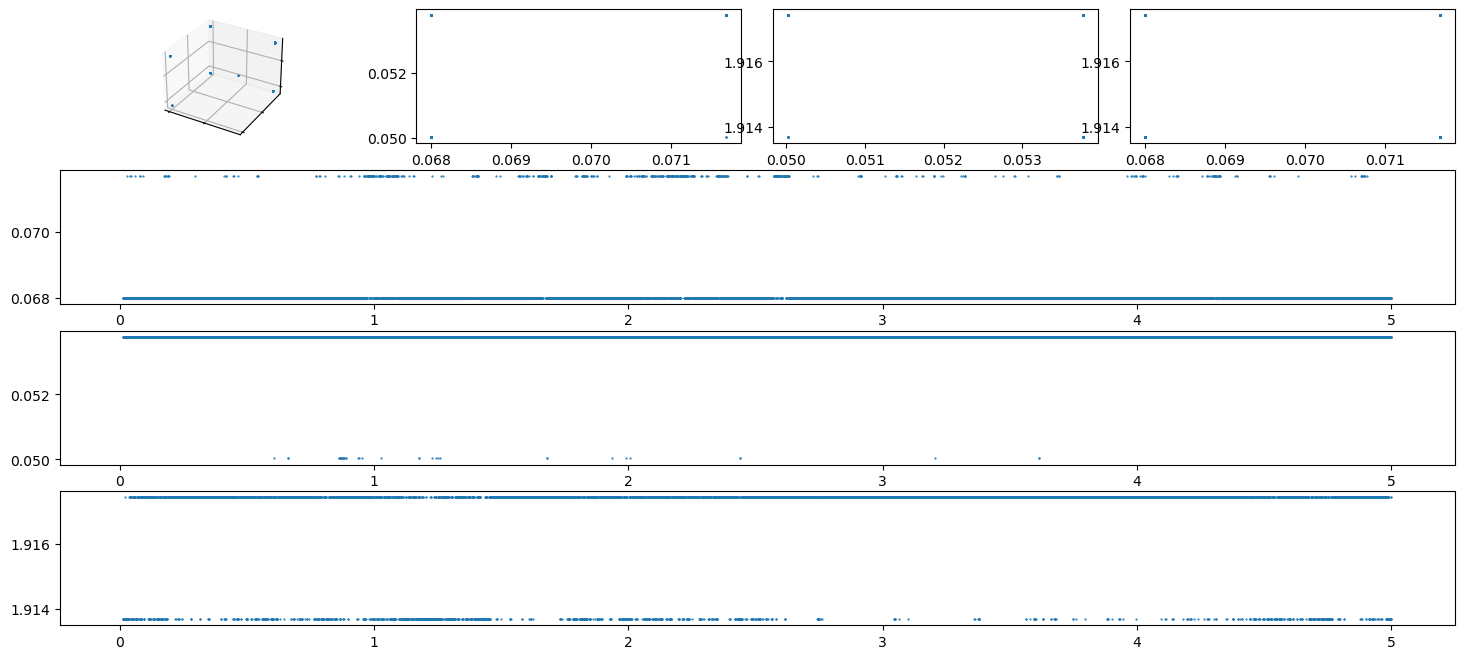

In [110]:
t,ch1,ch2,ch3= meas

fig = plt.figure(figsize=(18,8))
grid = gs.GridSpec(4,4,wspace=0.1,)

XY = plt.subplot(grid[0,1])
YZ = plt.subplot(grid[0,2])
XZ = plt.subplot(grid[0,3])

XT = plt.subplot(grid[1,:])
YT = plt.subplot(grid[2,:])
ZT = plt.subplot(grid[3,:])

XT.scatter(t,ch1,s=0.3)
YT.scatter(t,ch2,s=0.3)
ZT.scatter(t,ch3,s=0.3)

XY.scatter(ch1,ch2,s=0.3)
YZ.scatter(ch2,ch3,s=0.3)
XZ.scatter(ch1,ch3,s=0.3)

plot3D = fig.add_subplot(grid[0,0],projection='3d')
plot3D.scatter(*meas[1:],s=0.3)
# plot3D.set_xlabel("Channel 1")
# plot3D.set_ylabel("Channel 2")
# plot3D.set_zlabel("Channel 3")
# plot3D.set_title("Chua's circuit")

plot3D.set_xticklabels([])
plot3D.set_yticklabels([])
plot3D.set_zticklabels([])
plt.show()

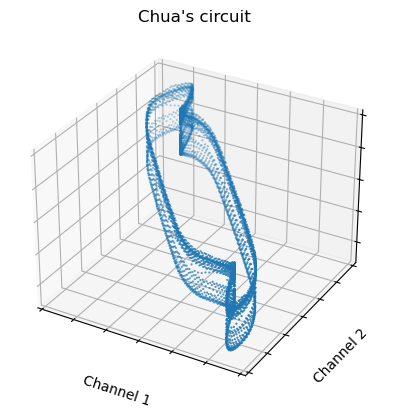

In [25]:
fig = plt.figure() 
ax = fig.add_subplot(projection='3d')

ax.scatter(*meas[1:],s=0.3)
ax.set_xlabel("Channel 1")
ax.set_ylabel("Channel 2")
ax.set_zlabel("Channel 3")
ax.set_title("Chua's circuit")

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

# Run Multiple Measurements

Single channel, no syncing. 

In [ ]:
freq = np.linspace(0,1e3,1000)
amp = np.linspace(0,5,20)

data = {}
for F in amp:
    data[F] = {}
    for f in freq:
        data[F][f] = "NA"

rate = sampling(1.0)   
rng = 20

ad2.config_oscilloscope(swim
    ,range0=rng
    ,range1=rng
    ,sample_rate = rate
    )

amp = list(data.keys())
freq = list(data[0].keys())

# Perform measurements by varying parameters.
for F in tqdm(amp):
    for f in freq:
        ad2.config_wavegen(zoroku
                        , frequency=f
                        ,amplitude=2
                        ,signal_shape=dwfc.funcSine
                        )
        ad2.start_wavegen(zoroku,channel=0)
        time.sleep(0.1)

        t,ch1,ch2 = ad2.measure_oscilloscope(zoroku)

        ad2.stop_wavegen(zoroku,channel=0)
        ad2.reset_wavegen(zoroku,channel=0)
        time.sleep(0.1)

        data[F][f] = [t,ch1,ch2]

        fig = plt.figure(figsize=(18,8))
        grid = gs.GridSpec(2,2,wspace=0.1,)
        
        XY = plt.subplot(grid[:,0])
        XT = plt.subplot(grid[0,1])
        YT = plt.subplot(grid[1,1])
        
        XY.scatter(ch1,ch2); XT.scatter(t,ch2) ; YT.scatter(t,ch2)
        fig.save(f"Diode_amp{F}-freq{f}.png")

handle = open("chua_circ.pkl", 'wb')
pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
handle.close()